 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [288]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [289]:
# Reading whale returns
file_path = Path("whale_returns.csv")
df_combined_returns = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
df_combined_returns = df_combined_returns.sort_index() 


In [290]:
# Count nulls
df_combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [291]:
# Drop nulls
df_combined_returns.dropna(inplace = True)
df_combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [292]:
# Reading algorithmic returns
csv_algorithmic = Path("algo_returns.csv")
csv_combined_returns = pd.read_csv(csv_algorithmic, index_col="Date", infer_datetime_format=True, parse_dates=True)
csv_combined_returns = csv_combined_returns.sort_index()

In [293]:
# Count nulls
csv_combined_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [294]:
# Drop nulls
csv_combined_returns.dropna(inplace = True)
csv_combined_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [295]:
# Reading S&P 500 Closing Prices
csv_sp500 = Path("sp500_history.csv")
sp500_data = pd.read_csv(csv_sp500, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data = sp500_data.sort_index()

In [296]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [297]:
# Fix Data Types
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].str.replace(",", "")
sp500_data["Close"] = sp500_data["Close"].astype("float")
sp500_data.dtypes

C:\Users\withn\AppData\Local\Temp/ipykernel_16316/2742832925.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")


Close    float64
dtype: object

In [298]:
# Calculate Daily Returns
sp500_returns = sp500_data.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [299]:
# Drop nulls
sp500_data.isnull().sum()
sp500_data.dropna(inplace=True)
sp500_data.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [300]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data.columns = [ "S&P 500" ]
sp500_data.head()

,S&P 500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [301]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([df_combined_returns, csv_combined_returns])
combined_returns
combined_data = pd.concat([combined_returns,sp500_data])
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,2907.06
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,2900.45
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,2905.03


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [302]:
# Plot daily returns of all portfolios


#### Calculate and Plot cumulative returns.

In [303]:
# Calculate cumulative returns of all portfolios
portfolio_data = combined_data.pct_change()
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

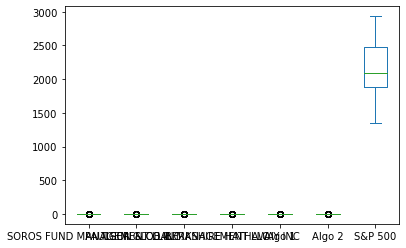

In [304]:
# Box plot to visually show risk
cumulative_profit = combined_data 
cumulative_profit.plot.box()

### Calculate Standard Deviations

In [305]:
# Calculate the daily standard deviations of all portfolios
company_returns = combined_data.pct_change()
company_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,NaN,NaN,NaN
2015-03-05,0.800968,0.257544,-1.929234,0.596558,NaN,NaN,NaN
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,NaN,NaN,NaN
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,NaN,NaN,NaN


### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:xlabel='Date'>

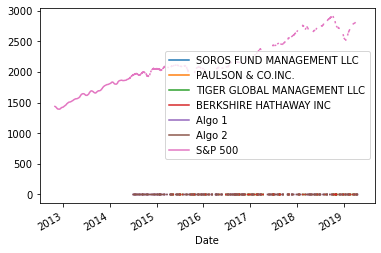

In [306]:
# Calculate  the daily standard deviation of S&P 500
stocks = combined_data.rolling(window=21).mean()
stocks
# Determine which portfolios are riskier than the S&P 500
stocks.plot()

### Calculate the Annualized Standard Deviation

In [307]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_data.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.                 0.110754
SOROS FUND MANAGEMENT LLC         0.124487
Algo 1                            0.126801
Algo 2                            0.134401
TIGER GLOBAL MANAGEMENT LLC       0.171830
BERKSHIRE HATHAWAY INC            0.203682
S&P 500                        6383.488916
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

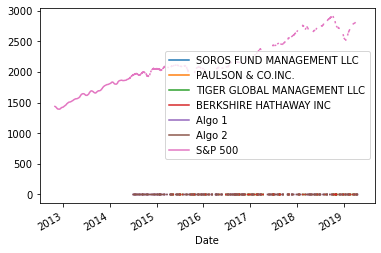

In [308]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
company_returns = combined_data.pct_change()
company_returns.head()
# Plot the rolling standard deviation
stocks.plot()

### Calculate and plot the correlation

In [309]:
# Calculate the correlation
stocks = combined_data.corr()
# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Banking'}, xlabel='Date'>

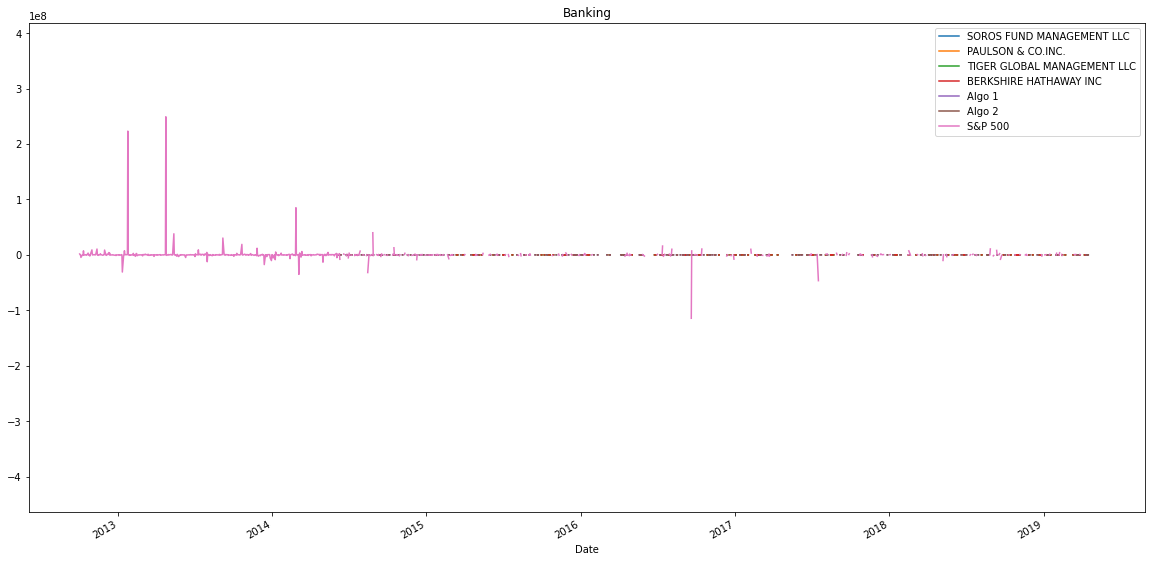

In [310]:
# Calculate covariance of a single portfolio
covariance = combined_data['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_data['S&P 500'])
covariance
# Calculate variance of S&P 500
variance = combined_data['S&P 500'].var()
variance
# Computing beta
combined_beta = covariance / variance
combined_beta
# Plot beta trend
rolling_beta = combined_data / portfolio_data
rolling_beta.plot(figsize=(20, 10), title='Banking')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21 days'}, xlabel='Date'>

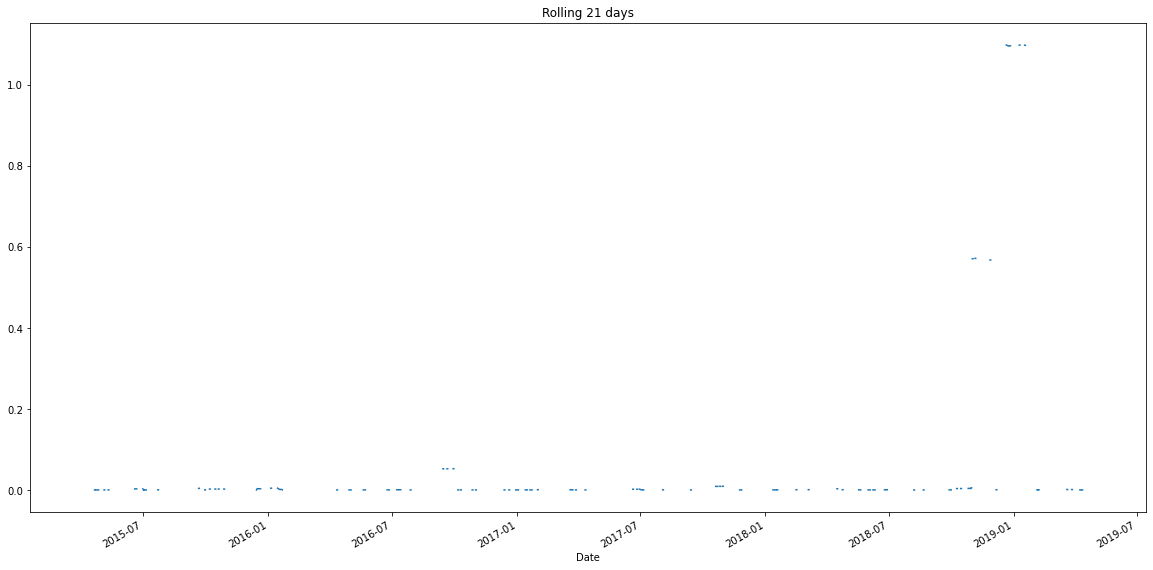

In [311]:
# Use `ewm` to calculate the rolling window
rolling_variance = rolling_beta['SOROS FUND MANAGEMENT LLC'].rolling(window=21).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 21 days')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [312]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))

# Display data
sharpe_ratios

SOROS FUND MANAGEMENT LLC       0.361568
PAULSON & CO.INC.              -0.462131
TIGER GLOBAL MANAGEMENT LLC    -0.118257
BERKSHIRE HATHAWAY INC          0.619628
Algo 1                          1.300176
Algo 2                          0.639258
S&P 500                        85.044155
dtype: float64

<AxesSubplot:title={'center':'Banking'}>

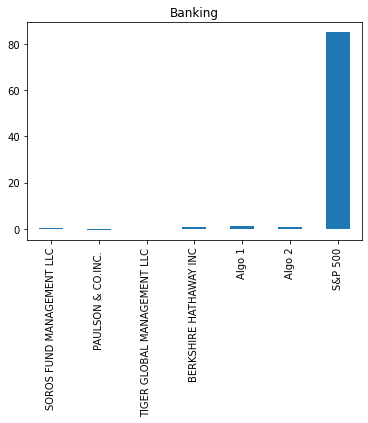

In [313]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Banking")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [314]:
# Reading data from 1st stock
APPL_filepath = Path("AAPL - Sheet1.csv")
APPL_watch = pd.read_csv(APPL_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
APPL_watch.sort_index(ascending=True, inplace=True)
APPL_watch.head()

,Close
Date,
2015-03-02 16:00:00,32.27
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65


In [315]:
# Reading data from 2nd stock
goog_filepath = Path("Untitled spreadsheet - Sheet1 (1).csv")
goog_search = pd.read_csv(goog_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog_search.sort_index(ascending=True, inplace=True)
goog_search.head()

,Close
Date,
2015-03-02 16:00:00,569.78
2015-03-03 16:00:00,572.07
2015-03-04 16:00:00,571.80
2015-03-05 16:00:00,573.75
2015-03-06 16:00:00,566.13


In [316]:
# Reading data from 3rd stock
facebook_filepath = Path("FB - Sheet1.csv")
facebook_mark = pd.read_csv(facebook_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
facebook_mark.sort_index(ascending=True, inplace=True)
facebook_mark.head()

,Close
Date,
2015-03-02 16:00:00,79.75
2015-03-03 16:00:00,79.60
2015-03-04 16:00:00,80.90
2015-03-05 16:00:00,81.21
2015-03-06 16:00:00,80.01


In [317]:
# Combine all stocks in a single DataFrame
portfolio_price = pd.concat([APPL_watch, goog_search, facebook_mark], axis="columns", join="inner")
portfolio_price.columns = ["AAPL", "GOOG", "FB"]
portfolio_price.head()

,AAPL,GOOG,FB
Date,,,
2015-03-02 16:00:00,32.27,569.78,79.75
2015-03-03 16:00:00,32.34,572.07,79.60
2015-03-04 16:00:00,32.14,571.80,80.90
2015-03-05 16:00:00,31.60,573.75,81.21
2015-03-06 16:00:00,31.65,566.13,80.01


In [318]:
# Reset Date index
portfolio_price.reset_index()

,Date,AAPL,GOOG,FB
0,2015-03-02 16:00:00,32.27,569.78,79.75
1,2015-03-03 16:00:00,32.34,572.07,79.60
2,2015-03-04 16:00:00,32.14,571.80,80.90
3,2015-03-05 16:00:00,31.60,573.75,81.21
4,2015-03-06 16:00:00,31.65,566.13,80.01
...,...,...,...,...
1044,2019-04-24 16:00:00,51.79,1256.00,182.58
1045,2019-04-25 16:00:00,51.32,1263.45,193.26
1046,2019-04-26 16:00:00,51.08,1272.18,191.49
1047,2019-04-29 16:00:00,51.15,1287.58,194.78


In [319]:
# Reorganize portfolio data by having a column per symbol
portfolio_price
print(type(portfolio_price))

<class 'pandas.core.frame.DataFrame'>


In [320]:
# Calculate daily returns

# Drop NAs
portfolio_before = portfolio_price.isnull().sum()
portfolio_price.dropna(inplace=True)
portfolio_after = portfolio_price.isnull().sum()
# Display sample data
portfolio_price.head()

,AAPL,GOOG,FB
Date,,,
2015-03-02 16:00:00,32.27,569.78,79.75
2015-03-03 16:00:00,32.34,572.07,79.60
2015-03-04 16:00:00,32.14,571.80,80.90
2015-03-05 16:00:00,31.60,573.75,81.21
2015-03-06 16:00:00,31.65,566.13,80.01


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [321]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted = portfolio_price.pct_change()
portfolio_weighted.dropna(inplace=True)
# Display sample data
portfolio_weighted.head()

,AAPL,GOOG,FB
Date,,,
2015-03-03 16:00:00,0.002169,0.004019,-0.001881
2015-03-04 16:00:00,-0.006184,-0.000472,0.016332
2015-03-05 16:00:00,-0.016801,0.003410,0.003832
2015-03-06 16:00:00,0.001582,-0.013281,-0.014777
2015-03-09 16:00:00,0.004423,0.002049,-0.007124


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [322]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_price = pd.concat([combined_data, portfolio_price])
all_portfolio_price.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,GOOG,FB
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_before = portfolio_weighted.isnull().sum()
portfolio_weighted.dropna(inplace=True)
portfolio_after = portfolio_weighted.isnull().sum()

# Display data
portfolio_weighted.head()

,AAPL,GOOG,FB
Date,,,
2015-03-03 16:00:00,0.002169,0.004019,-0.001881
2015-03-04 16:00:00,-0.006184,-0.000472,0.016332
2015-03-05 16:00:00,-0.016801,0.003410,0.003832
2015-03-06 16:00:00,0.001582,-0.013281,-0.014777
2015-03-09 16:00:00,0.004423,0.002049,-0.007124


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [324]:
# Calculate the annualized `std`
annualized_std = portfolio_price * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'stock price for 21 days)'}, xlabel='Date'>

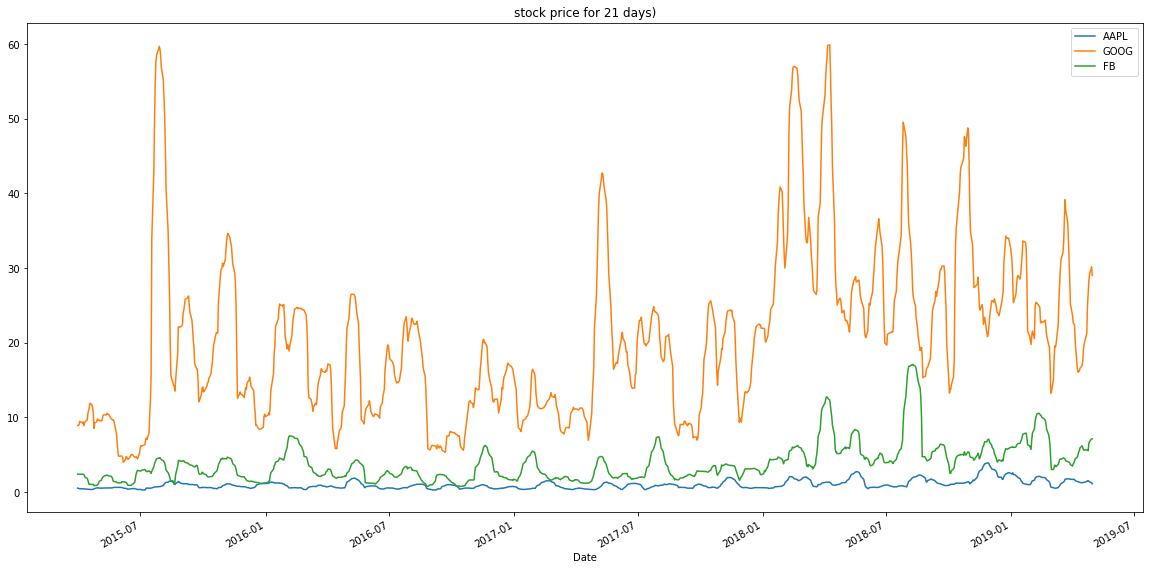

In [325]:
# Calculate rolling standard deviation
portfolio_price.rolling(window=21).std().plot(kind='line', figsize=(20, 10), title="stock price for 21 days)")
# Plot rolling standard deviation


### Calculate and plot the correlation

In [331]:
# Calculate and plot the correlation
correlation = portfolio_price.corr()
correlation.head()

,AAPL,GOOG,FB
AAPL,1.000000,0.866398,0.781554
GOOG,0.866398,1.000000,0.927255
FB,0.781554,0.927255,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [330]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (portfolio_price.mean() * 252) / (portfolio_price.std() * np.sqrt(252))
sharpe_ratios

AAPL    64.416109
GOOG    68.101321
FB      63.698656
dtype: float64

In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!